# **IMPORT LIBRARY YANG DIBUTUHKAN**

In [62]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Code diatas untuk mengimport seluruh library yang dibutuhkan selama proses pembuatan model berlangsung.

# **GATHERING / LOAD DATA**

In [63]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Dataset yang digunakan bernama 'diabetes_prediction_dataset.csv'. Pada dataset tersebut terdapat 2 kolom yang bertipe string. Namun ada 3 kolom lainnya yang sebenarnya categorical.

In [64]:
df["hypertension"] = df["hypertension"].replace({0:"No", 1:"Yes"})
df["heart_disease"] = df["heart_disease"].replace({0:"No", 1:"Yes"})
df["diabetes"] = df["diabetes"].replace({0:"No", 1:"Yes"})

Pada code diatas, diubah nlai yang bersifat kategorikal yang masih bertipe integer kedalam string. Hal ini ditujukan agar ketika pengecekan outlier, kolom tersebut tidak dihitung untuk pencarian quartil 1 dan quartil 3.

In [65]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,No,Yes,never,25.19,6.6,140,No
1,Female,54.0,No,No,No Info,27.32,6.6,80,No
2,Male,28.0,No,No,never,27.32,5.7,158,No
3,Female,36.0,No,No,current,23.45,5.0,155,No
4,Male,76.0,Yes,Yes,current,20.14,4.8,155,No
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,No,No,No Info,27.32,6.2,90,No
99996,Female,2.0,No,No,No Info,17.37,6.5,100,No
99997,Male,66.0,No,No,former,27.83,5.7,155,No
99998,Female,24.0,No,No,never,35.42,4.0,100,No


Terlihat bahwa dataset tersebut berisi 9 kolom data, dimana terdapat 2 kolom berisi text. Nantinya, data di kolom gender dan smooking_history akan di labeli dengan angka.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.9+ MB


Pada hasil yang ditampilkan terlihat bahwa ke sembilan kolom tersebut memiliki data sebanyak 100.000.

# **ASSESSING DATA**

## **Missing Value**

In [67]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Pada pengecekan nilai null, dapat disimpulkan bahwa tidak ada data yang bernilai null. Sehingga dataset tersebut bersih dari null

## **Invalid Value**

In [68]:
df.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


Pengecekan data yang tidak masuk akal memberikan hasil bahwa semua data yang ada pada dataset masuk akal dan tidak perlu dilakukan pembersihan

## **Duplicate Data**

In [69]:
df.duplicated().sum()

3854

Dari hasil pengecekan duplikat, maka diketahui terdapat 3.854 data yang duplikat. Data tersebut nantinya akan kita hapus.

# **CLEANING DATA**

Karena yang perlu dibersihkan hanya data duplikat, maka kita cukup melakukan drop baris yang duplikat saja

In [70]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  object 
 3   heart_disease        96146 non-null  object 
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 7.3+ MB


Terlihat bahwa data yang tadinya 100000, setelah dilakukan penghapusan duplikat tersisa 96146 data.

## **Outliers**

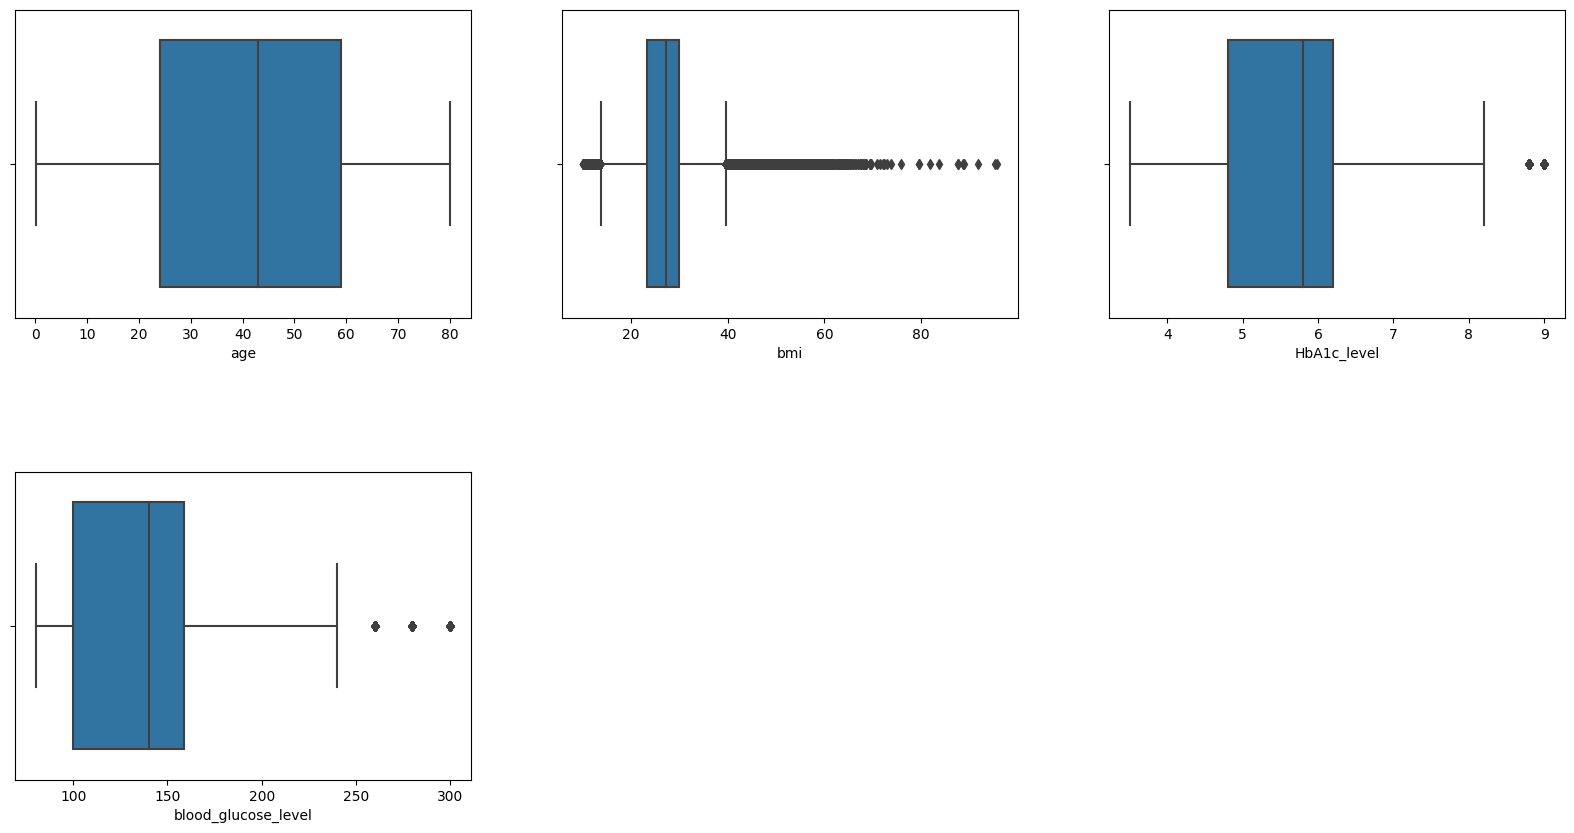

In [72]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(x=df['age'])

plt.subplot(2,3,2)
sns.boxplot(x=df['bmi'])

plt.subplot(2,3,3)
sns.boxplot(x=df['HbA1c_level'])

plt.subplot(2,3,4)
sns.boxplot(x=df['blood_glucose_level'])

plt.subplots_adjust(hspace=0.5)


Pada hasil boxplot diatas, dapat dilihat terdapat beberapa outlier yang terlihat. Untuk memastikan outlier tidak ikut dalam proses pembentukan model, maka dihapus data tersebut.

In [73]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

batas_bawah = Q1 - 1.5*IQR
batas_atas = Q3 + 1.5*IQR

df = df[~((df<batas_bawah)|(df>batas_atas)).any(axis=1)]
df.shape

<ipython-input-73-25a1ef7f8248>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-73-25a1ef7f8248>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-73-25a1ef7f8248>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<batas_bawah)|(df>batas_atas)).any(axis=1)]


(88195, 9)

Pada hasil penangan outlier, data yang tadinya 96146 menjadi 88195 data. Jumlah data tersebut adalah data akhir yang akan diolah untuk mengklasifikasikan diabetes.

# **EXPLORATORY DATA ANALYSIS**

In [74]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,No,Yes,never,25.19,6.6,140,No
1,Female,54.0,No,No,No Info,27.32,6.6,80,No
2,Male,28.0,No,No,never,27.32,5.7,158,No
3,Female,36.0,No,No,current,23.45,5.0,155,No
4,Male,76.0,Yes,Yes,current,20.14,4.8,155,No


In [75]:
by_sex_positive = df[df["diabetes"]=="No"]["gender"].value_counts()
by_sex_negative = df[df["diabetes"]=="Yes"]["gender"].value_counts()

Pada code diatas ditujukan untuk mengelompokkan sampel mana yang positif/negatif diabetes berdasarkan jenis kelamin.

In [76]:
by_hypertension_positive = df[df["diabetes"]=="No"]["hypertension"].value_counts()
by_hypertension_negative = df[df["diabetes"]=="Yes"]["hypertension"].value_counts()

Pada code diatas ditujukan untuk mengelompokkan sampel mana yang positif/negatif diabetes berdasarkan riwayat hipertensi.

In [77]:
by_heart_disease_positive = df[df["diabetes"]=="No"]["heart_disease"].value_counts()
by_heart_disease_negative = df[df["diabetes"]=="Yes"]["heart_disease"].value_counts()

Pada code diatas ditujukan untuk mengelompokkan sampel mana yang positif/negatif diabetes berdasarkan riwayat penyakit jantung.

In [78]:
by_smoking_history_positive = df[df["diabetes"]=="No"]["smoking_history"].value_counts()
by_smoking_history_negative = df[df["diabetes"]=="Yes"]["smoking_history"].value_counts()

Pada code diatas ditujukan untuk mengelompokkan sampel mana yang positif/negatif diabetes berdasarkan riwayat merokok.

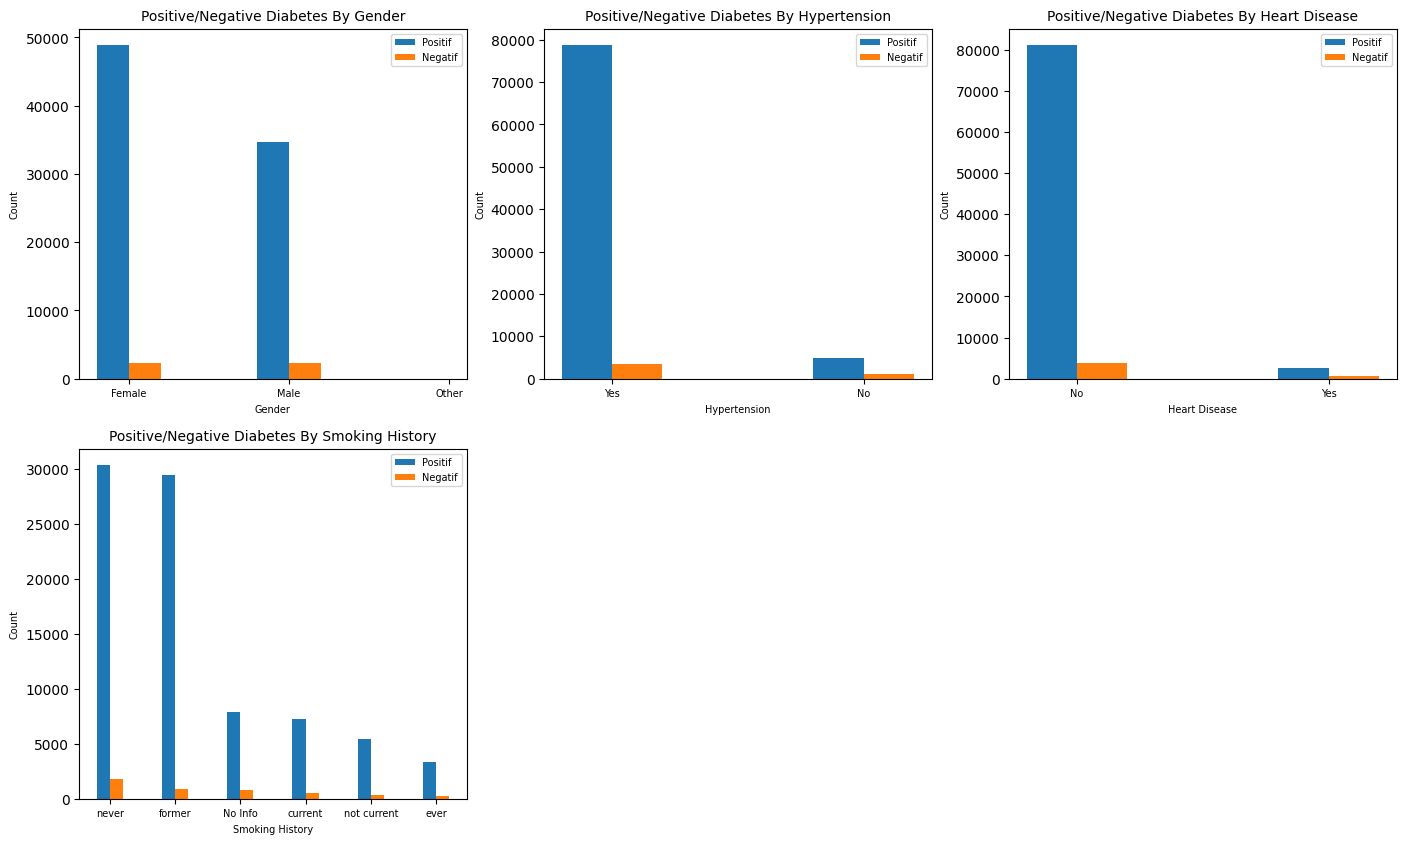

In [79]:
fig, ax = plt.subplots(2, 3, figsize=(17, 10))
ax[0, 0].bar([0, 1, 2], by_sex_positive, width=0.2, label='Positif', align='center')
ax[0, 0].bar([0.2, 1.2], by_sex_negative, width=0.2, label='Negatif', align='center')
ax[0, 0].set_xticks([0.1, 1.1, 2.1])
ax[0, 0].set_xticklabels(['Female', 'Male', 'Other'],fontsize=7)
ax[0, 0].set_title('Positive/Negative Diabetes By Gender', fontsize=10)
ax[0, 0].set_xlabel('Gender',fontsize=7)
ax[0, 0].set_ylabel('Count',fontsize=7)
ax[0, 0].legend(fontsize=7)


ax[0, 1].bar([0, 1], by_hypertension_positive, width=0.2, label='Positif', align='center')
ax[0, 1].bar([0.2, 1.2], by_hypertension_negative, width=0.2, label='Negatif', align='center')
ax[0, 1].set_xticks([0.1, 1.1])
ax[0, 1].set_xticklabels(['Yes', 'No'],fontsize=7)
ax[0, 1].set_title('Positive/Negative Diabetes By Hypertension', fontsize=10)
ax[0, 1].set_xlabel('Hypertension',fontsize=7)
ax[0, 1].set_ylabel('Count',fontsize=7)
ax[0, 1].legend(fontsize=7)

ax[0, 2].bar([0, 1], by_heart_disease_positive, width=0.2, label='Positif', align='center')
ax[0, 2].bar([0.2, 1.2], by_heart_disease_negative, width=0.2, label='Negatif', align='center')
ax[0, 2].set_xticks([0.1, 1.1])
ax[0, 2].set_xticklabels(['No', 'Yes'], fontsize=7)
ax[0, 2].set_title('Positive/Negative Diabetes By Heart Disease', fontsize=10)
ax[0, 2].set_xlabel('Heart Disease', fontsize=7)
ax[0, 2].set_ylabel('Count', fontsize=7)
ax[0, 2].legend(fontsize=7)


ax[1, 0].bar([0, 1, 2, 3, 4, 5], by_smoking_history_positive, width=0.2, label='Positif', align='center')
ax[1, 0].bar([0.2, 1.2, 2.2, 3.2, 4.2, 5.2], by_smoking_history_negative, width=0.2, label='Negatif', align='center')
ax[1, 0].set_xticks([0.1, 1.1, 2.1, 3.1, 4.1, 5.1])
ax[1, 0].set_xticklabels(['never', 'former', 'No Info', 'current', 'not current', 'ever'],fontsize=7)
ax[1, 0].set_title('Positive/Negative Diabetes By Smoking History', fontsize=10)
ax[1, 0].set_xlabel('Smoking History',fontsize=7)
ax[1, 0].set_ylabel('Count',fontsize=7)
ax[1, 0].legend(fontsize=7)

fig.delaxes(ax[1, 1])
fig.delaxes(ax[1, 2])
plt.show()

Dari hasil visualisasi keterikatan kolom yang kategorikal terhadap kolom target, dapat dilihat bahwa yang paling mempengaruhi adalah riwayat phipertensi ('hypertension') pasien. hampir 80000 pasien yang memiliki hipertensi, positif diabetes.

Kolom lainnya yang memiliki keterikatan kuat terhadap hasil diabetes adalah riwayat merokok, walaupun pada grafik terlihat bahwa orang yang tidak pernah merokok ('never') lebih banyak positif. terbukti bahwa mantan perokok ('former') mengidap penyakit diabetes itu hampir 30000. Hal ini menunjukkan bahwa 2/3 dari pengidap penyakit diabetes, pernah merokok.

Sedangkan lebih dari 1/2 pengidap diabetes berjenis kelamin perempuan. Riwayat penyakit jantung tidak memiliki pengaruh yang signifikan terhadap penyakit diabetes. Hal ini terbukti bahwa lebih dari 80000 sampel tidak memiliki riwayat hipertensi terkena penyakit diabetes.


In [80]:
tipe_bmi = []

for tipe in df['bmi']:
  if tipe <= 18.5:
    tipe_bmi.append('underweight')
  elif(tipe > 18.5 and tipe <= 24.9):
    tipe_bmi.append('normal')
  elif(tipe > 24.9 and tipe <=29.9):
    tipe_bmi.append('overweight')
  else :
    tipe_bmi.append('obesity')

df['tipe_bmi'] = tipe_bmi

<ipython-input-80-d6c3c7a31b78>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tipe_bmi'] = tipe_bmi


Code diatas digunakan untuk mengkategorikan bmi kedalam underweight, normal, overweight dan obesity.




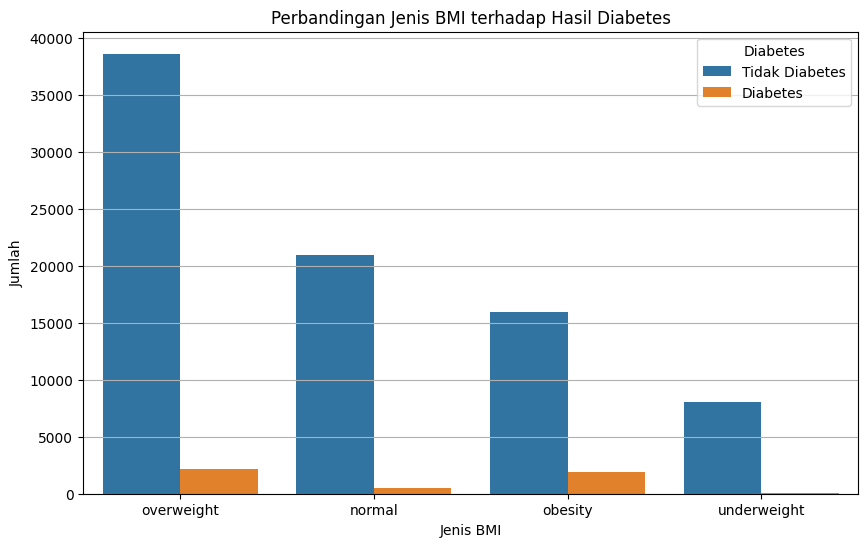

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='tipe_bmi',
    hue='diabetes',
    data=df)
plt.title('Perbandingan Jenis BMI terhadap Hasil Diabetes')
plt.xlabel('Jenis BMI')
plt.ylabel('Jumlah')
plt.legend(title='Diabetes', loc='upper right', labels=['Tidak Diabetes', 'Diabetes'])
plt.grid(axis='y')
plt.show()

Dari hasil visualisasi 47% dari total sampel positif diabetes dengan tipe bmi 'overweight. Sedangan sekitar 10% dari total sampel, positif diabetes dengan tipe bmi 'underweight'.

In [82]:
blood_glucose = []

for level in df['blood_glucose_level']:
  if level <= 99:
    blood_glucose.append('normal')
  elif (level > 99) and (level <=125):
    blood_glucose.append('prediabetes')
  else :
    blood_glucose.append('diabetes')

df['blood_glucose_test'] = blood_glucose

<ipython-input-82-d694981d80a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blood_glucose_test'] = blood_glucose


Code diatas digunakan untuk mengkategorikan tingkat gula darah kedalam normal, prediabetes, dan diabetes.

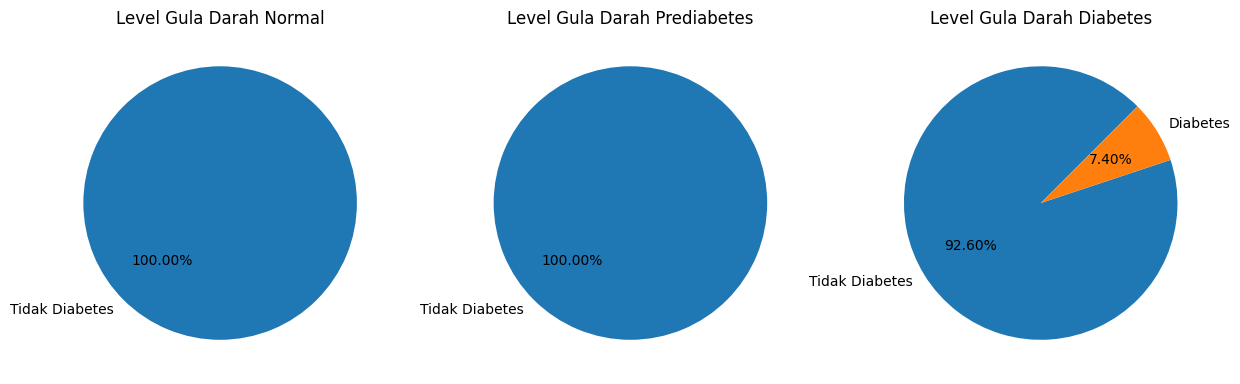

In [83]:
plt.figure(figsize=[15,15])

plt.subplot(1,3,1)
plt.pie(df[df['blood_glucose_test']=='normal']['diabetes'].value_counts().values, labels=['Tidak Diabetes'], autopct='%1.2f%%', startangle=45)
plt.title('Level Gula Darah Normal')


plt.subplot(1,3,2)
plt.pie(df[df['blood_glucose_test'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['Tidak Diabetes'], autopct='%1.2f%%',startangle = 45)
plt.title('Level Gula Darah Prediabetes')

plt.subplot(1,3,3)
plt.pie(df[df['blood_glucose_test'] == 'diabetes']['diabetes'].value_counts().values, labels = ['Tidak Diabetes', 'Diabetes'], autopct='%1.2f%%', startangle = 45)
plt.title('Level Gula Darah Diabetes')
plt.show()

Dari hasil visualisasi diatas, level gula darah normal dan prediabetes 100% tidak terkena diabetes. Level gula darah diabetes memiliki 12.27% dari total sampel, positif terkena diabetes

In [84]:
df.drop(columns='tipe_bmi', inplace=True)
df.drop(columns='blood_glucose_test', inplace=True)

<ipython-input-84-c9ea14090ee9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='tipe_bmi', inplace=True)
<ipython-input-84-c9ea14090ee9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='blood_glucose_test', inplace=True)


In [85]:
df_eda = df.copy()
df_eda.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,No,Yes,never,25.19,6.6,140,No
1,Female,54.0,No,No,No Info,27.32,6.6,80,No
2,Male,28.0,No,No,never,27.32,5.7,158,No
3,Female,36.0,No,No,current,23.45,5.0,155,No
4,Male,76.0,Yes,Yes,current,20.14,4.8,155,No


Untuk dataset pada proses exploratory data analysis (EDA), digunakan dataset hasil copy dari dataset 'df'.



In [86]:
df_eda["gender"] = df_eda["gender"].replace({"Female":0, "Male":1, "Other":2})
df_eda["hypertension"] = df_eda["hypertension"].replace({"No":0, "Yes":1})
df_eda["heart_disease"] = df_eda["heart_disease"].replace({"No":0, "Yes":1})
df_eda["diabetes"] = df_eda["diabetes"].replace({"No":0, "Yes":1})

df_eda.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


Selanjutnya setelah di copy, maka pada kolom 'gender', 'hypertension', 'heart_disease', dan 'diabetes', diubah bentuknya kedalam angka 0 dan 1.

In [87]:
df_eda = pd.concat([df_eda, pd.get_dummies(df_eda['smoking_history'], prefix='smoking_history')], axis=1)
df_eda.drop(["smoking_history"], axis=1, inplace=True)
df_eda.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


Pada kolom 'smoking_history', nilainya ada 6. Selanjutnya akan dibuat kolom baru berdasarkan 6 nilai tersebut. Jika ya, maka diberi nilai 1, dan jika tidak diberi nilai 0.

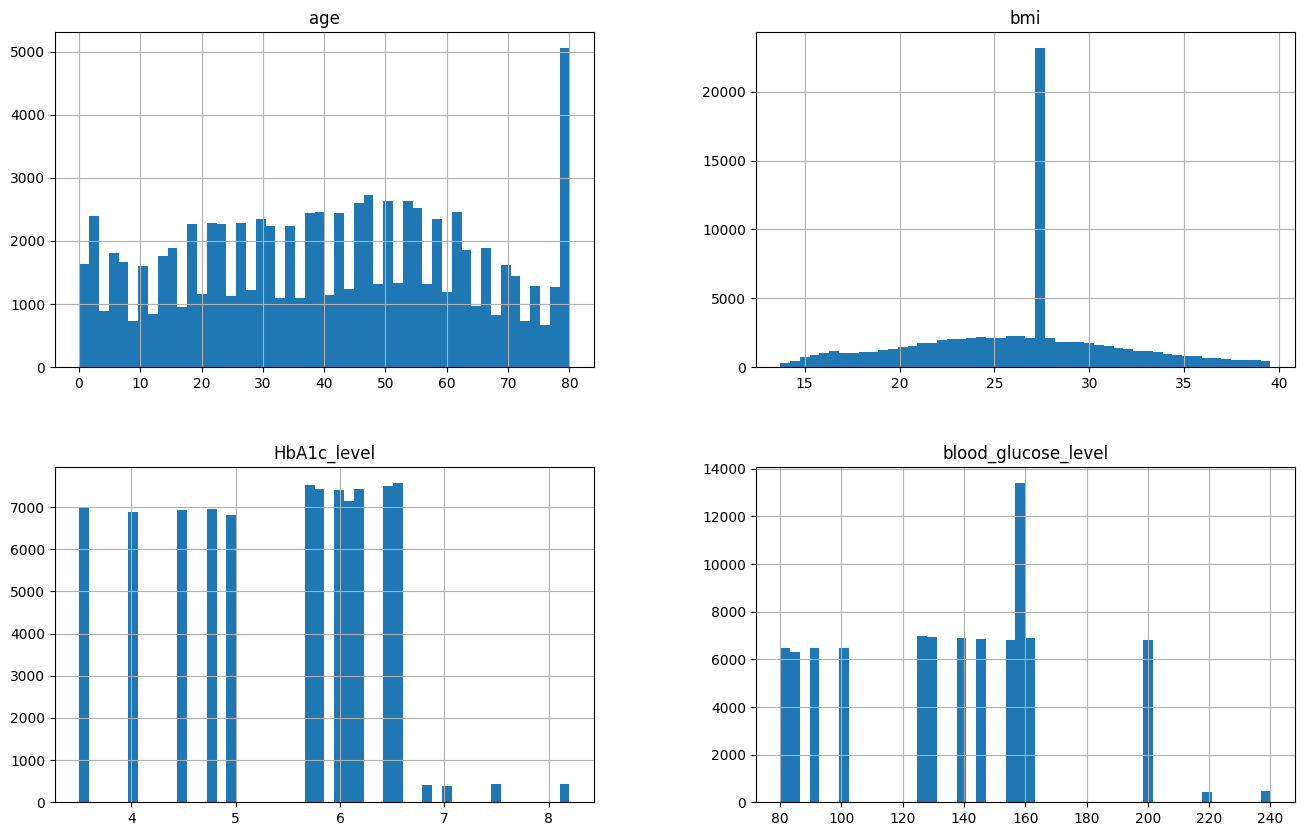

In [88]:
numerical_col = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

df_eda[numerical_col].hist(bins=50, figsize=(16,10))
plt.show()

Pada hasil visualisasi data diatas, dapat disimpulkan beberapa hal yaitu :

1. Pada rentang usia 77 - 80 tahun, memiliki jumlah positif diabetes terbesar.
2. BMI pada rentang 25-30, positif diabetes hampir 30000 sampel
3. level HbA1c_level pada rentang 0-6.5, memiliki sampel positif lebih dari 1/2 jumlah sampel
4. level blood_glucose_level pada rentang 150-160, memiliki sampel positif diabetes lebih banyak dibandingakan yang lainnya.

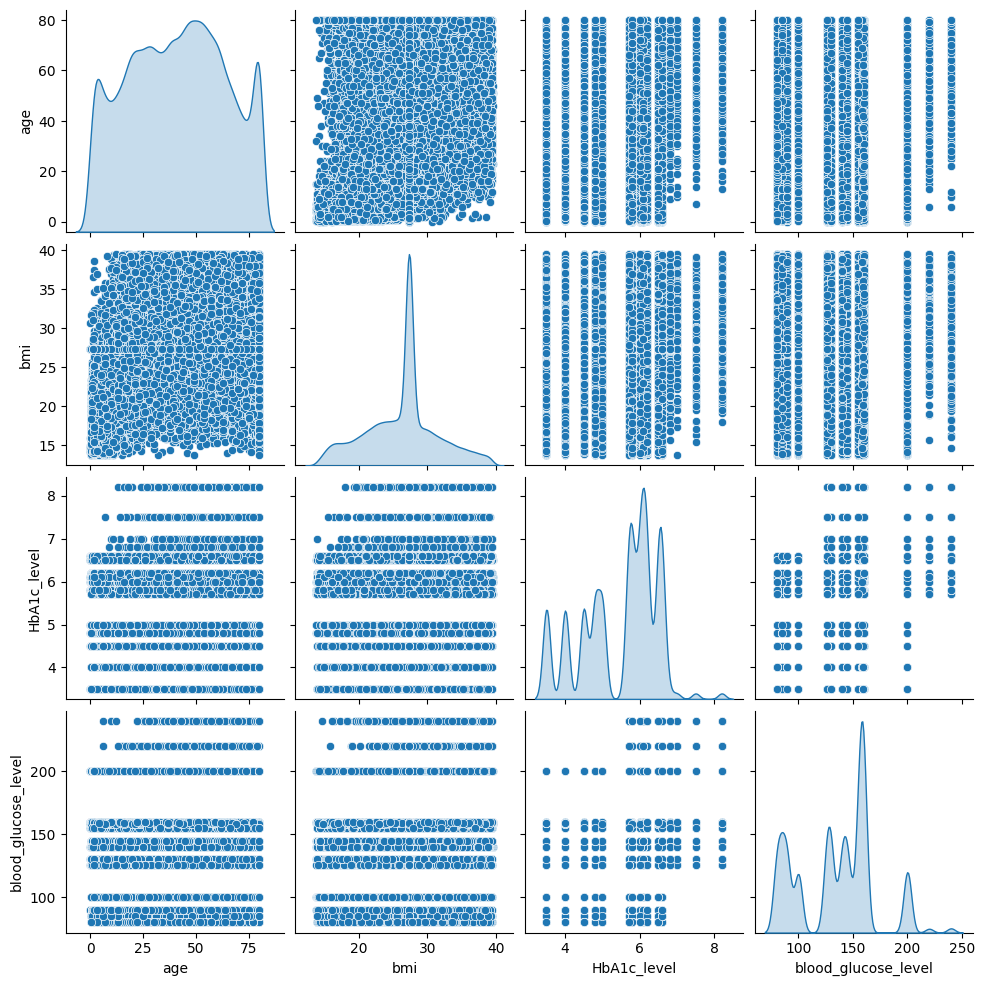

In [89]:
sns.pairplot(df_eda[numerical_col], diag_kind='kde')

Pada hasil visualisasi diatas, dominan titik titik pada pairplot nya memiliki korelasi positif. Hal ini terbukti pada titik titiknya berjejer ke kanan. Hal ini menunjukkan korelasi positif dari setiap variabel.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

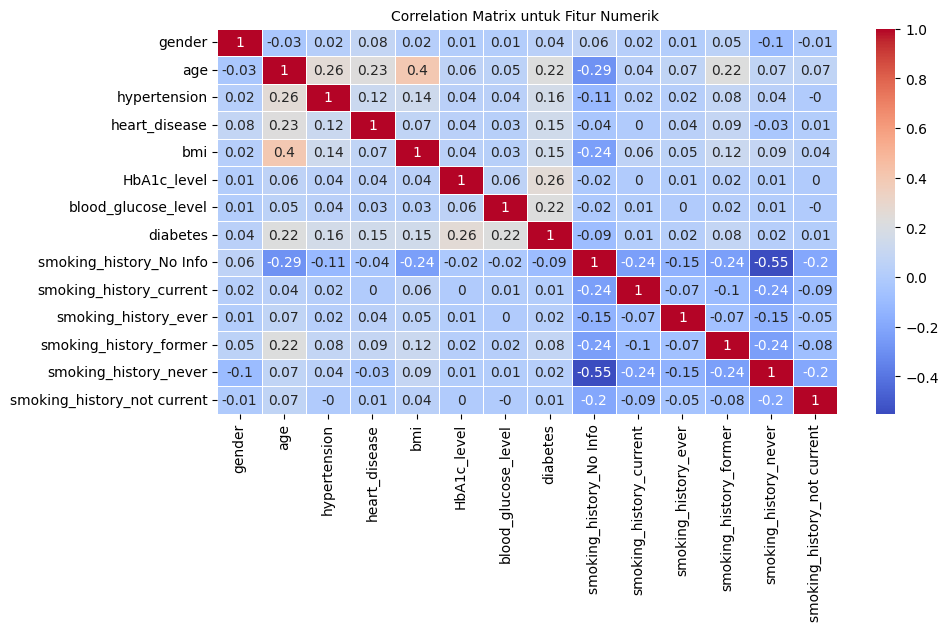

In [90]:
plt.figure(figsize=(10, 5))
correlation_matrix = df_eda.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=10)

Pada hasil korelasi, kolom 'diabetes' memiliki korelasi paling tinggi dengan kolom 'HbA1c_level'. Selanjutnya diikuti oleh kolom 'age' dan 'blood_glucose_level'.

Sedangkan korelasi paling rendah dengan kolom 'diabetes' adalah kolom 'smoking_history_not_current' dan kolom 'smoking_history_current'.

# **DATA PREPARATION**




Karena data pada dataset 'df_eda' telah diubah semua nilainya kedalam numerik, maka dicopy saja nilainya kedalam dataset baru. Tujuannya agar tidak melakukan hal yang sama 2 kali.

In [91]:
df_prep = df_eda.copy()
df_prep.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


## **Standarisasi Data / Skalasi Data**

yang akan di skalasi yaitu hanya kolom independen saja. Jadi buat satu variabel yang akan menampung dari kolom independen saja, yaitu 'gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_No_Info','smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not_current'.

In [92]:
X = df_prep.drop(columns='diabetes', axis=1)

Untuk menampung 13 kolom tersebut, maka cukup menghapus 1 kolom 'diabetes', dimana kolom tersebut merupakan kolom target

In [93]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Untuk menskalasi/menstandarisasi data, maka digunakan StandardScaler() menggunakan library Scikit-learn.

In [94]:
standarized_data = scaler.transform(X)

Selanjutnya data yang telah di standarisasi, dilakukan transform terhadap variabel X yang menampung 13 variabel independen tersebut

In [95]:
print(standarized_data)

[[-0.85009453  1.72326913 -0.27107262 ... -0.31872209  1.34993715
  -0.26443364]
 [-0.85009453  0.57235412 -0.27107262 ... -0.31872209 -0.74077523
  -0.26443364]
 [ 1.17437182 -0.5785609  -0.27107262 ... -0.31872209  1.34993715
  -0.26443364]
 ...
 [ 1.17437182  1.10354566 -0.27107262 ...  3.1375296  -0.74077523
  -0.26443364]
 [-0.85009453 -0.75562475 -0.27107262 ... -0.31872209  1.34993715
  -0.26443364]
 [-0.85009453  0.705152   -0.27107262 ... -0.31872209 -0.74077523
  -0.26443364]]


In [96]:
X = standarized_data
y = df_prep['diabetes']

Setelah itu, maka tentukan variabel independen dan variabel dependen setelah dilakukan skalasi/standarisasi. Variabel independen merupakan X, dan variabel dependen merupakan y.

## **Pembagian Data Latih dan Data Testing**

Perbandingan antara data latih dan data testing adalalah 80% : 20%, dengan random_state 2.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=2)

In [98]:
print(X.shape, X_train.shape, X_test.shape)

(88195, 13) (70556, 13) (17639, 13)


# **MODEL DEVELOPMENT**




Pada pembentukan model ini, digunakan 4 algoritma untuk membandingkan algoritma mana yang terbaik untuk digunakan pada dataset berikut. Empat algoritma tersebut yaitu,

- Support Vector Classifier
- Random Forest Classifier
- Logistic Regression
- AdaBoost Classifier

Sebelum memulai pembentukan model, maka dibuat satu dataframe untuk menampung nilai test_accuracy dan train_accuracy dari setiap algoritma yang digunakan.

In [99]:
models = pd.DataFrame(index=['Train Accuracy', 'Test Accuracy'],
                      columns=['SVC', 'Random Forest', 'Logistic Regression', 'AdaBoost Classifier'])

## **Support Vector Classifier (SVC)**

Pada model algoritma Support Vector Classifier (SVC), digunakan kernel 'linear' pada parameter SVC nya.

In [100]:
svc_model = svm.SVC(kernel='linear')
svc_model.fit(X_train, y_train)
X_train_predict = svc_model.predict(X_train)
X_test_predict = svc_model.predict(X_test)

train_data_accuracy = accuracy_score(X_train_predict, y_train)
test_data_accuracy = accuracy_score(X_test_predict, y_test)

models.loc['Train Accuracy', 'SVC'] = train_data_accuracy
models.loc['Test Accuracy', 'SVC'] = test_data_accuracy

Setelah dilakukan pembentukan model, maka hitung nilai accuracy train dan test nya. Setelah dilakukan penghitungan, maka dimasukkan accuracy train dan test nya kedalam dataframe yang telah disediakan.

## **Random Forest Classifier**

Pada model algoritma Random Forest Classifier, digunakan n_estimators senilai 50 dengan random state 2.

In [101]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=2)
rf_model.fit(X_train, y_train)
X_train_predict_rf = rf_model.predict(X_train)
X_test_predict_rf = rf_model.predict(X_test)

train_data_accuracy_rf = accuracy_score(X_train_predict_rf, y_train)
test_data_accuracy_rf = accuracy_score(X_test_predict_rf, y_test)

models.loc['Train Accuracy', 'Random Forest'] = train_data_accuracy_rf
models.loc['Test Accuracy', 'Random Forest'] = test_data_accuracy_rf

Setelah dilakukan pembentukan model, maka hitung nilai accuracy train dan test nya. Setelah dilakukan penghitungan, maka dimasukkan accuracy train dan test nya kedalam dataframe yang telah disediakan.

## **Logistic Regression**

Pada model algoritma Logistic Regression, digunakan parameter solver bernilai 'liblinear' dan penalty 'l1'.

In [102]:
lr_model = LogisticRegression(solver='liblinear', penalty='l1')
lr_model.fit(X_train, y_train)
X_train_predict_lr = lr_model.predict(X_train)
X_test_predict_lr = lr_model.predict(X_test)

train_data_accuracy_lr = accuracy_score(X_train_predict_lr, y_train)
test_data_accuracy_lr = accuracy_score(X_test_predict_lr, y_test)

models.loc['Train Accuracy', 'Logistic Regression'] = train_data_accuracy_lr
models.loc['Test Accuracy', 'Logistic Regression'] = test_data_accuracy_lr

Setelah dilakukan pembentukan model, maka hitung nilai accuracy train dan test nya. Setelah dilakukan penghitungan, maka dimasukkan accuracy train dan test nya kedalam dataframe yang telah disediakan.

## **AdaBoost Classifier**

Pada algoritma AdaBoost Classifier, parameter yang digunakan sama seperti algoritma Random Forest Classifier, yaitu n_estimators 50, dan random_state 2.

In [103]:
abc_model = AdaBoostClassifier(n_estimators=50, random_state=2)
abc_model.fit(X_train, y_train)
X_train_predict_abc = abc_model.predict(X_train)
X_test_predict_abc = abc_model.predict(X_test)

train_data_accuracy_abc = accuracy_score(X_train_predict_abc, y_train)
test_data_accuracy_abc = accuracy_score(X_test_predict_abc, y_test)

models.loc['Train Accuracy', 'AdaBoost Classifier'] = train_data_accuracy_abc
models.loc['Test Accuracy', 'AdaBoost Classifier'] = test_data_accuracy_abc

Setelah dilakukan pembentukan model, maka hitung nilai accuracy train dan test nya. Setelah dilakukan penghitungan, maka dimasukkan accuracy train dan test nya kedalam dataframe yang telah disediakan.

# **EVALUASI MODEL**

In [104]:
models

,SVC,Random Forest,Logistic Regression,AdaBoost Classifier
Train Accuracy,0.961265,0.998852,0.96247,0.973014
Test Accuracy,0.960372,0.96984,0.960996,0.971994


Dari hasil dataframe yang berisi train dan test accuracy dari setiap algoritma yang digunakan, memiliki tingkat accuracy yang tinggi. Tingkat train accuracy terdapat pada algoritma Random Forest. Sedangkan tingkat test accuracy tertinggi terdapat pada AdaBoost Classifier

In [105]:
evaluasi = pd.DataFrame(index=['Hasil'],
                      columns=['Fakta','SVC', 'Random Forest', 'Logistic Regression', 'AdaBoost Classifier'])

Code diatas diguanakan untuk membuat DataFrame untuk menampung hasil prediksi yang dilakukan pada saat evaluasi model

In [106]:
input_data = (0, 80.0, 0, 1, 25.19, 6.6, 150, 0, 0, 0, 0, 1, 0)
evaluasi.loc['Hasil', 'Fakta'] = "Tidak Terkena (0)"

input_data_array = np.array(input_data)
input_reshape = input_data_array.reshape(1,-1)
std_data = scaler.transform(input_reshape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


input_data pada code diatas diambil dari baris pertama pada dataset. Kemudian data tersebut di sklaasi dan diubah kedalam bentuk matriks. Hasil seharusnya adalah Tidak terkena diabetes. Jadi dimasukkan fakta tersebut kedalam DataFrame pada kolom Fakta.

In [107]:
svc_prediction = svc_model.predict(std_data)
if(svc_prediction[0] == 0):
  print("Pasien tidak terkena diabetes")
  evaluasi.loc['Hasil', 'SVC'] = "Tidak Terkena (0)"
else :
  print("Pasien terkena diabetes")
  evaluasi.loc['Hasil', 'SVC'] = "Terkena (1)"


Pasien tidak terkena diabetes


Proses ini ditujukan untuk melakukan prediksi menggunakan algoritma Support Vector Classifier. Selanjutnya hasil prediksi akan dimasukkan kedalam DataFrame

In [108]:
rf_prediction = rf_model.predict(std_data)
if(rf_prediction[0] == 0):
  print("Pasien tidak terkena diabetes")
  evaluasi.loc['Hasil', 'Random Forest'] = "Tidak Terkena (0)"
else :
  print("Pasien terkena diabetes")
  evaluasi.loc['Hasil', 'Random Forest'] = "Terkena (1)"

Pasien tidak terkena diabetes


Proses ini ditujukan untuk melakukan prediksi menggunakan algoritma Random Forest Classifier. Selanjutnya hasil prediksi akan dimasukkan kedalam DataFrame

In [109]:
lr_prediction = lr_model.predict(std_data)
if(lr_prediction[0] == 0):
  print("Pasien tidak terkena diabetes")
  evaluasi.loc['Hasil', 'Logistic Regression'] = "Tidak Terkena (0)"
else :
  print("Pasien terkena diabetes")
  evaluasi.loc['Hasil', 'Logistic Regression'] = "Terkena (1)"

Pasien tidak terkena diabetes


Proses ini ditujukan untuk melakukan prediksi menggunakan algoritma Logistic Regression. Selanjutnya hasil prediksi akan dimasukkan kedalam DataFrame

In [110]:
abc_prediction = abc_model.predict(std_data)
if(abc_prediction[0] == 0):
  print("Pasien tidak terkena diabetes")
  evaluasi.loc['Hasil', 'AdaBoost Classifier'] = "Tidak Terkena (0)"
else :
  print("Pasien terkena diabetes")
  evaluasi.loc['Hasil', 'AdaBoost Classifier'] = "Terkena (1)"

Pasien tidak terkena diabetes


Proses ini ditujukan untuk melakukan prediksi menggunakan algoritma AdaBoost Classifier. Selanjutnya hasil prediksi akan dimasukkan kedalam DataFrame

In [111]:
evaluasi

,Fakta,SVC,Random Forest,Logistic Regression,AdaBoost Classifier
Hasil,Tidak Terkena (0),Tidak Terkena (0),Tidak Terkena (0),Tidak Terkena (0),Tidak Terkena (0)


Dari hasil evaluasi yang dilakukan, nilai sebenarnya dengan nilai yang di prediksi sama. Hal ini membuktikan bahwa, model sudah dapat diimplementasikan kedalam bentuk yang lebih user friendly seperti website atau aplikasi.

# **PENYIMPANAN MODEL DAN DATASET YANG TELAH BERSIH**

Pada code berikut, digunakan untuk memnyimpan dataset yang telah bersih dari missing value, invalid value, dupliacate data, dan outlier.

In [112]:
df_prep.to_csv('diabets_dataset_clean.csv', index=False)

Tidak hanya dataset, model yang memiliki tingkat akurasi yaitu model dengan algoritma Random Forest Classifier, disimpan menggunakan library joblib. Model yang disimpan tersebut nantinya akan digunakan untuk pembuatan website atau aplikasi

In [113]:
filename = "diabetes_model.sav"
joblib.dump(rf_model, filename)

['diabetes_model.sav']